---

## Python programming for geoscience (120.113)

### Chapter 2: Time series and multi-dimensional datasets

#### 2.2: Time series data

---

### In this section you will learn....
- How to handle time series data with pandas
- How to create, read, and write pandas Series and Dataframes
- How to handle and manipulate pandas objects
- How to use pandas' DatetimeIndex functionality for time series operations
- How to use pandas to visualize time series data

### pandas
**[pandas](https://pandas.pydata.org/docs/user_guide/index.html)** is perhaps the most popular python package for handling time series
- Two basic structures:
    - [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series) for univariate time series
    - [Data frames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) for multivariate time series
- Numerous [date handling](https://pandas.pydata.org/docs/user_guide/timeseries.html) functionalities 
- [IO tools](https://pandas.pydata.org/docs/user_guide/io.html) as an interface to various file formats (csv, xml, ...)
- [Visualization capabilities](https://pandas.pydata.org/docs/user_guide/10min.html#plotting)
- and many more advanced functionalities.


![](./figures/2.1_data_frame.png)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#### Time series creation

- **Series** are 1-dimensional (including an index that may - but does not have to - hold the time information)
- **Data frames** are 2-dimensional data structures
    - Not in a geometric sense!
    - row-dimension typically holds the time (or any other "index")
    - column-dimension holds an arbitrary number of 1D time series

In [4]:
# Create dummy time stamps for demonstration
time = pd.date_range('2000-01-01', '2000-12-31', freq='D')

# Create dummy data
data1 = np.random.normal(0,1,len(time))
data2 = np.random.normal(5,1,len(time))

2000-01-01    0.508313
2000-01-02    0.078687
2000-01-03    1.443028
2000-01-04   -0.384539
2000-01-05   -0.859017
Freq: D, dtype: float64


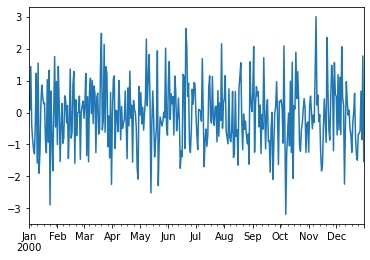

In [24]:
# Create a pandas Series (1-dimensional data)
Ser = pd.Series(data1, index=time)
print(Ser.head(5))
Ser.plot();

            column 1  column 2
2000-01-01  0.508313  5.661997
2000-01-02  0.078687  5.310385
2000-01-03  1.443028  5.611827
2000-01-04 -0.384539  5.840370
2000-01-05 -0.859017  5.947049


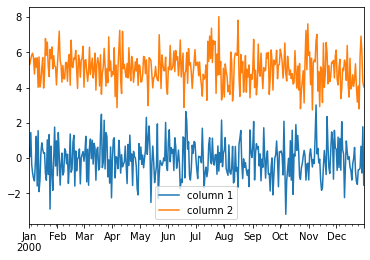

In [25]:
# Create a pandas Series (2-dimensional data)
df = pd.DataFrame({'column 1': data1, 'column 2': data2}, index=time)
print(df.head(5))
df.plot();

#### Data querying

- pandas Series or Dataframes are **built around 1D or 2D numpy arrays** 
- **Special labels** are assigned to the row and column indices to allow sophisticated querying 
- These labels can be of any data type, and even [multiple layers of indices](https://pandas.pydata.org/docs/user_guide/advanced.html) are possible 

In [7]:
# Accessing the row-indices of a Series or Dataframe:
print(Ser.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')


In [8]:
# Accessing the column-indices of a Dataframe
print(df.columns)

Index(['column 1', 'column 2'], dtype='object')


In [9]:
# Series are 1-dimensional and thus don't have column indices
print(Ser.head(5))

2000-01-01    0.508313
2000-01-02    0.078687
2000-01-03    1.443028
2000-01-04   -0.384539
2000-01-05   -0.859017
Freq: D, dtype: float64


In [10]:
# However, Series can be transformed into 1D data frames, and a "name" can be given assigned to it (before or after)
Ser.name = 123
print(pd.DataFrame(Ser).head(5))

                 123
2000-01-01  0.508313
2000-01-02  0.078687
2000-01-03  1.443028
2000-01-04 -0.384539
2000-01-05 -0.859017


In [11]:
# Accessing the underlying numpy array
print(df.values[0:5,0:5])

[[ 0.50831306  5.66199727]
 [ 0.07868711  5.31038514]
 [ 1.44302809  5.61182685]
 [-0.38453882  5.84036973]
 [-0.85901672  5.94704854]]


In [12]:
# Data can be accessed bei their index / column labels
print(df.loc['2000-04-01':'2000-04-05', 'column 1'], '\n')

# But also through standard numerical indexing
print(df.iloc[50:55, 1])

2000-04-01   -0.037032
2000-04-02    1.043686
2000-04-03    1.149921
2000-04-04   -1.128045
2000-04-05    0.070161
Freq: D, Name: column 1, dtype: float64 

2000-02-20    5.614202
2000-02-21    6.107348
2000-02-22    5.075708
2000-02-23    3.952423
2000-02-24    5.836783
Freq: D, Name: column 2, dtype: float64


In [13]:
# The DatetimeIndex additionally allows for date-specific querying... Some examples:
dates = pd.date_range('1999-12-31 22:34:57', periods=5, freq='h')

print(dates, '\n')

print(dates.is_leap_year, '\n')

print(dates.round('2D'), '\n')

print(dates[dates.year == 1999], '\n')


DatetimeIndex(['1999-12-31 22:34:57', '1999-12-31 23:34:57',
               '2000-01-01 00:34:57', '2000-01-01 01:34:57',
               '2000-01-01 02:34:57'],
              dtype='datetime64[ns]', freq='H') 

[False False  True  True  True] 

DatetimeIndex(['1999-12-31', '1999-12-31', '2000-01-02', '2000-01-02',
               '2000-01-02'],
              dtype='datetime64[ns]', freq=None) 

DatetimeIndex(['1999-12-31 22:34:57', '1999-12-31 23:34:57'], dtype='datetime64[ns]', freq='H') 



#### Data manipulation
- When working with time series, a special "DatetimeIndex" object allows sophisticated [date manipulation](https://pandas.pydata.org/docs/user_guide/timeseries.html) operations
- pandas furthermore supports numerous other data operations (see [the documentation](https://pandas.pydata.org/docs/user_guide/index.html))

In [14]:
# Creating a copy
Ser2 = Ser.copy()

# Adding a 12 hour shift to each time stamp
Ser2.index += pd.Timedelta(12.5, 'hours')
print(Ser2)

2000-01-01 12:30:00    0.508313
2000-01-02 12:30:00    0.078687
2000-01-03 12:30:00    1.443028
2000-01-04 12:30:00   -0.384539
2000-01-05 12:30:00   -0.859017
                         ...   
2000-12-27 12:30:00   -0.578231
2000-12-28 12:30:00    0.669788
2000-12-29 12:30:00   -0.848872
2000-12-30 12:30:00    1.775210
2000-12-31 12:30:00   -1.536358
Freq: D, Name: 123, Length: 366, dtype: float64


In [15]:
# Concatenate original and time-shifted Series
Ser3 = pd.concat((Ser, Ser2))
print(Ser3)

2000-01-01 00:00:00    0.508313
2000-01-02 00:00:00    0.078687
2000-01-03 00:00:00    1.443028
2000-01-04 00:00:00   -0.384539
2000-01-05 00:00:00   -0.859017
                         ...   
2000-12-27 12:30:00   -0.578231
2000-12-28 12:30:00    0.669788
2000-12-29 12:30:00   -0.848872
2000-12-30 12:30:00    1.775210
2000-12-31 12:30:00   -1.536358
Name: 123, Length: 732, dtype: float64


In [16]:
# Sort by time index
Ser3.sort_index(inplace=True)
print(Ser3.head(10))

2000-01-01 00:00:00    0.508313
2000-01-01 12:30:00    0.508313
2000-01-02 00:00:00    0.078687
2000-01-02 12:30:00    0.078687
2000-01-03 00:00:00    1.443028
2000-01-03 12:30:00    1.443028
2000-01-04 00:00:00   -0.384539
2000-01-04 12:30:00   -0.384539
2000-01-05 00:00:00   -0.859017
2000-01-05 12:30:00   -0.859017
Name: 123, dtype: float64


In [17]:
# Append new Series to the existing Data frame
Ser3.name = 'new column'
df2 = pd.concat((df, pd.DataFrame(Ser3)), axis=1)
print(df2.head(10))

                     column 1  column 2  new column
2000-01-01 00:00:00  0.508313  5.661997    0.508313
2000-01-01 12:30:00       NaN       NaN    0.508313
2000-01-02 00:00:00  0.078687  5.310385    0.078687
2000-01-02 12:30:00       NaN       NaN    0.078687
2000-01-03 00:00:00  1.443028  5.611827    1.443028
2000-01-03 12:30:00       NaN       NaN    1.443028
2000-01-04 00:00:00 -0.384539  5.840370   -0.384539
2000-01-04 12:30:00       NaN       NaN   -0.384539
2000-01-05 00:00:00 -0.859017  5.947049   -0.859017
2000-01-05 12:30:00       NaN       NaN   -0.859017


In [18]:
# Pandas is quite good in handling NaN values for certain operations
# e.g., calculating a correlation matrix
print(df2.corr())

            column 1  column 2  new column
column 1    1.000000  0.013502    1.000000
column 2    0.013502  1.000000    0.013502
new column  1.000000  0.013502    1.000000


In [19]:
# Alternatively, NaN values can easily be removed
df2.dropna(inplace=True)
print(df2.head(5))

            column 1  column 2  new column
2000-01-01  0.508313  5.661997    0.508313
2000-01-02  0.078687  5.310385    0.078687
2000-01-03  1.443028  5.611827    1.443028
2000-01-04 -0.384539  5.840370   -0.384539
2000-01-05 -0.859017  5.947049   -0.859017


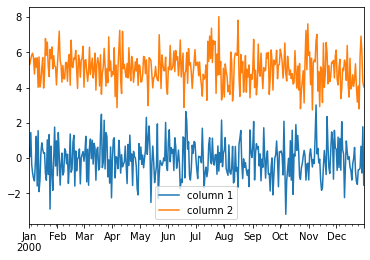

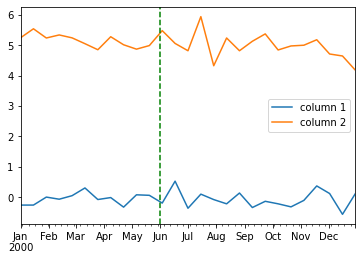

In [27]:
# Numerous other special operations exist on the DatetimeIndex
df.plot();

# e.g., temporal resampling to fortnightly averages
df.resample('14D').mean().plot();

# matplotlib is integrated with datetime64 axes!
plt.axvline('6/1/2000 23:15', color='green', linestyle='--');

#### File I/O
- pandas has [integrated interfaces](https://pandas.pydata.org/docs/user_guide/io.html) for numerous file types
- e.g., .csv, .xml, .html, .hdf, ...

In [21]:
# Writing out an existing pandas object, including output precision specification
df.to_csv('./data/df.txt', float_format='%.2f')

In [22]:
# Reading the data from a file, chosing a data column to be chosen as row labels (i.e., df.index)
data = pd.read_csv('./data/2_example.csv', index_col=0, parse_dates=True)

#### Some applied example
- Creating the climatology of a soil moisture time series

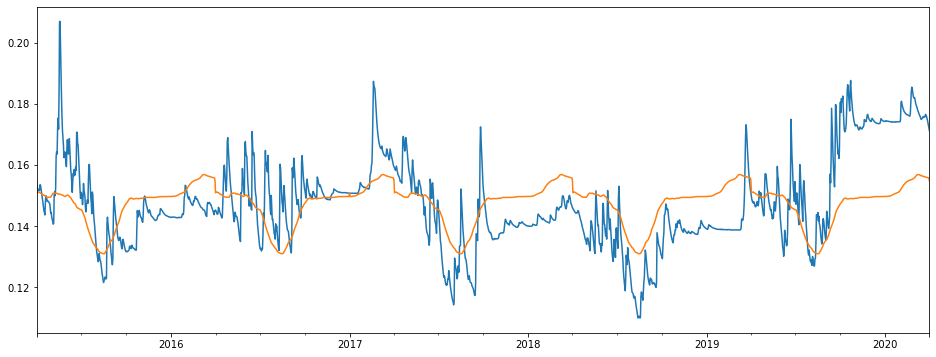

In [29]:
fig, ax = plt.subplots(figsize=(16,6))
data['soil moisture'].plot(ax=ax);

# apply a 5-week moving average window to smooth time series 
clim = data['soil moisture'].rolling('35d', center=True).mean()

# calculate the average value for each day-of-year over al years
clim = clim.groupby(data.index.dayofyear).mean()

# fetch and plot climatological value for each date of the original data
data['climatology'] = clim[data.index.dayofyear].values
data['climatology'].plot(ax=ax);